http://mckinziebrandon.me/TensorflowNotebooks/2016/12/21/openai.html

In [97]:
# The typical imports
import gym
import numpy as np
import matplotlib.pyplot as plt

## Overview

### Details
* Name: CartPole-v0  
* Category: Classic Control
* [Leaderboard Page](https://github.com/openai/gym/wiki/Leaderboard#cartpole-v0)
* Old links:
  * [Environment Page](https://gym.openai.com/envs/CartPole-v0)  
  * [Algorithms Page](https://gym.openai.com/algorithms?groups=classic_control)

### Description
A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum starts upright, and the goal is to prevent it from falling over by increasing and reducing the cart's velocity.

### Source
This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson 


## Environment

### Observation
Type: Box(4)

Num | Observation | Min | Max
---|---|---|---
0 | Cart Position | -2.4 | 2.4
1 | Cart Velocity | -Inf | Inf
2 | Pole Angle | ~ -41.8&deg; | ~ 41.8&deg;
3 | Pole Velocity At Tip | -Inf | Inf

### Actions
Type: Discrete(2)

Num | Action
--- | ---
0 | Push cart to the left
1 | Push cart to the right

Note: The amount the velocity is reduced or increased is not fixed as it depends on the angle the pole is pointing. This is because the center of gravity of the pole increases the amount of energy needed to move the cart underneath it

### Reward
Reward is 1 for every step taken, including the termination step

### Starting State
All observations are assigned a uniform random value between ±0.05

### Episode Termination
1. Pole Angle is more than ±20.9°
2. Cart Position is more than ±2.4 (center of the cart reaches the edge of the display)
3. Episode length is greater than 200

### Solved Requirements
Considered solved when the average reward is greater than or equal to 195.0 over 100 consecutive trials.

In [98]:
env = gym.make('CartPole-v0')
print(env.action_space)
print(env.observation_space)
print(env.reward_range)
print(env.reset())
print(env.action_space.sample())


Discrete(2)
Box(4,)
(-inf, inf)
[ 0.00989012 -0.01073844 -0.02989787  0.02045692]
0


In [99]:
help(env)


Help on TimeLimit in module gym.wrappers.time_limit object:

class TimeLimit(gym.core.Wrapper)
 |  The main OpenAI Gym class. It encapsulates an environment with
 |  arbitrary behind-the-scenes dynamics. An environment can be
 |  partially or fully observed.
 |  
 |  The main API methods that users of this class need to know are:
 |  
 |      step
 |      reset
 |      render
 |      close
 |      seed
 |  
 |  When implementing an environment, override the following methods
 |  in your subclass:
 |  
 |      _step
 |      _reset
 |      _render
 |      _close
 |      _seed
 |  
 |  And set the following attributes:
 |  
 |      action_space: The Space object corresponding to valid actions
 |      observation_space: The Space object corresponding to valid observations
 |      reward_range: A tuple corresponding to the min and max possible rewards
 |  
 |  Note: a default reward range set to [-inf,+inf] already exists. Set it if you want a narrower range.
 |  
 |  The methods are access

Episode 1/40 finished after 200 timesteps

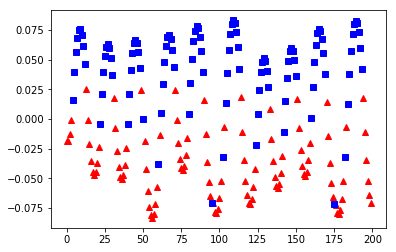

Episode 2/40 finished after 200 timesteps

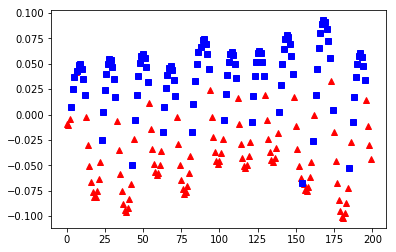

Episode 3/40 finished after 200 timesteps

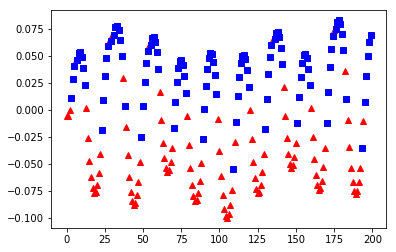

Episode 4/40 finished after 200 timesteps

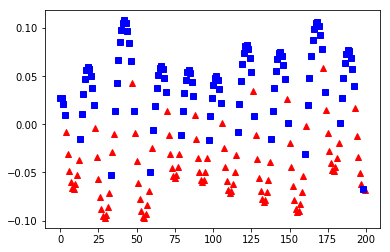

Episode 5/40 finished after 200 timesteps

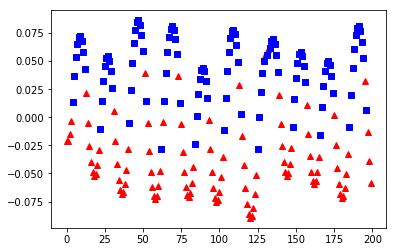

Episode 6/40 finished after 200 timesteps

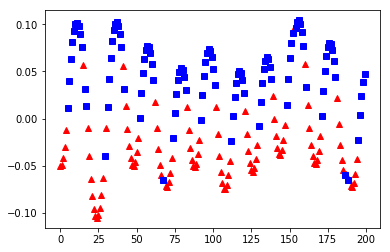

Episode 7/40 finished after 200 timesteps

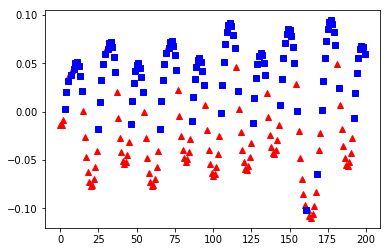

Episode 8/40 finished after 200 timesteps

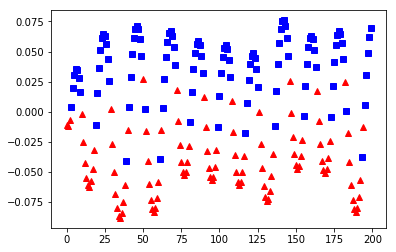

Episode 9/40 finished after 200 timesteps

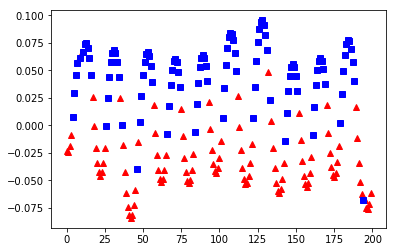

Episode 10/40 finished after 200 timesteps

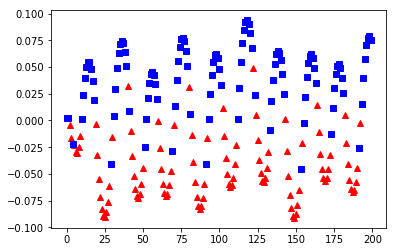

Episode 11/40 finished after 200 timesteps

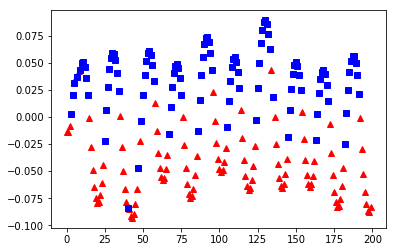

Episode 12/40 finished after 200 timesteps

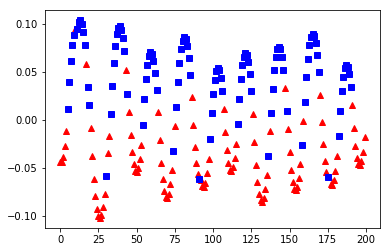

Episode 13/40 finished after 200 timesteps

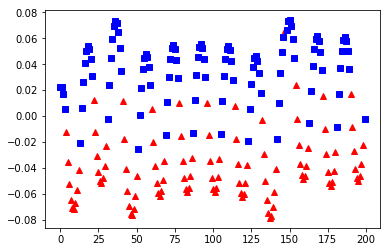

Episode 14/40 finished after 200 timesteps

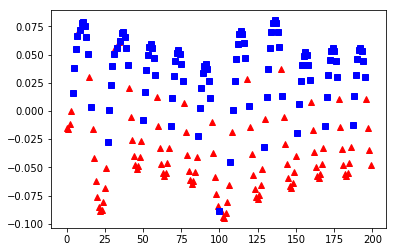

Episode 15/40 finished after 200 timesteps

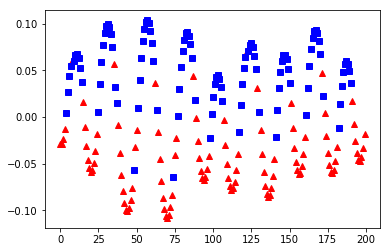

Episode 16/40 finished after 200 timesteps

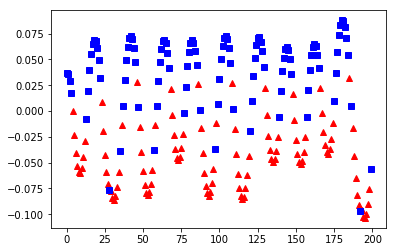

Episode 17/40 finished after 200 timesteps

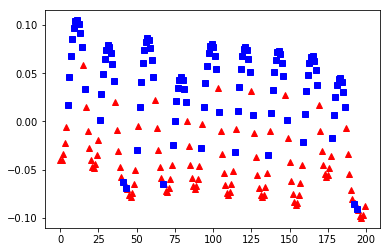

Episode 18/40 finished after 200 timesteps

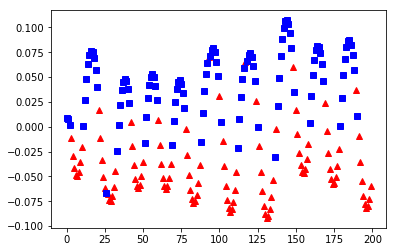

Episode 19/40 finished after 200 timesteps

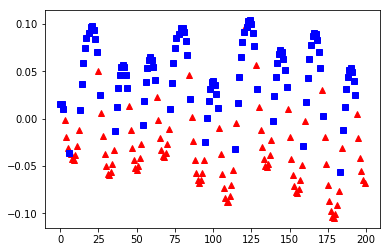

Episode 20/40 finished after 200 timesteps

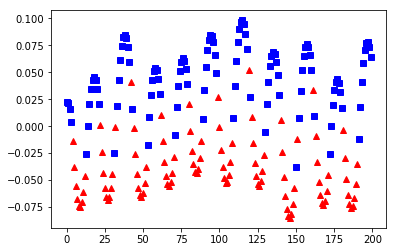

Episode 21/40 finished after 200 timesteps

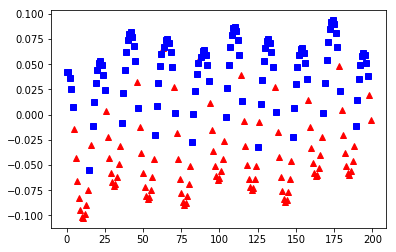

Episode 22/40 finished after 200 timesteps

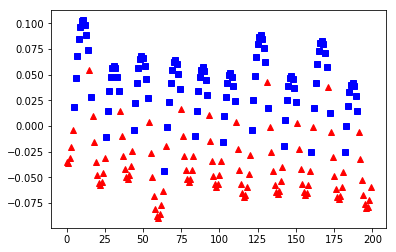

Episode 23/40 finished after 200 timesteps

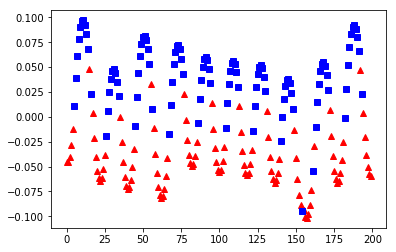

Episode 24/40 finished after 200 timesteps

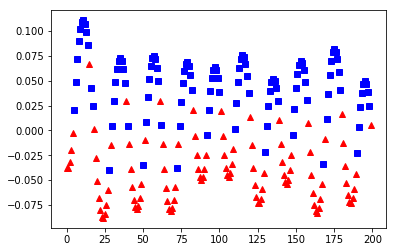

Episode 25/40 finished after 200 timesteps

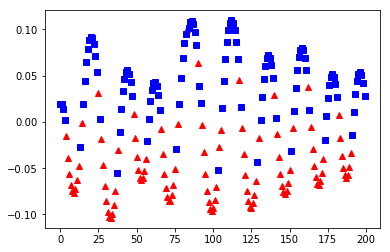

Episode 26/40 finished after 200 timesteps

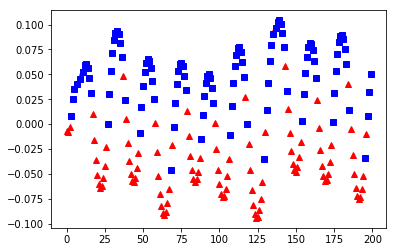

Episode 27/40 finished after 200 timesteps

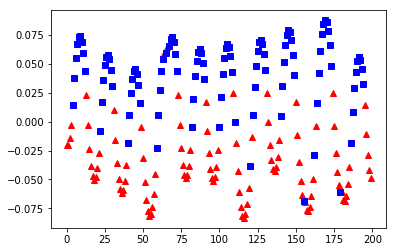

Episode 28/40 finished after 200 timesteps

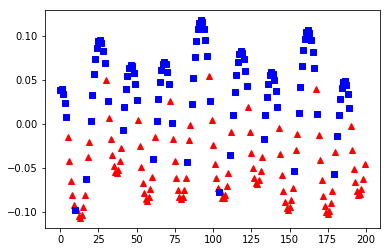

Episode 29/40 finished after 200 timesteps

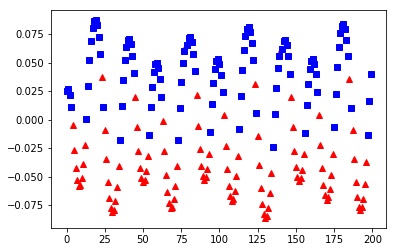

Episode 30/40 finished after 200 timesteps

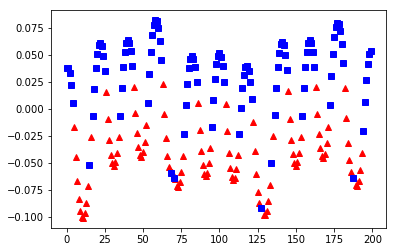

Episode 31/40 finished after 200 timesteps

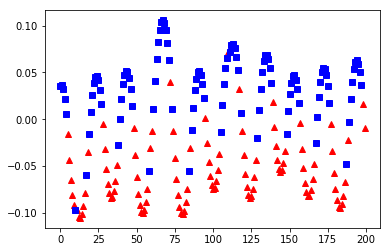

Episode 32/40 finished after 200 timesteps

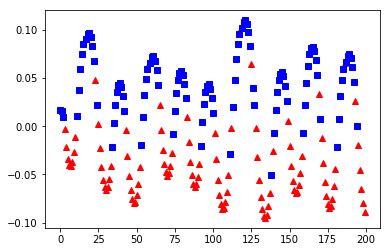

Episode 33/40 finished after 200 timesteps

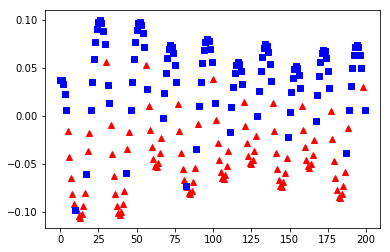

Episode 34/40 finished after 200 timesteps

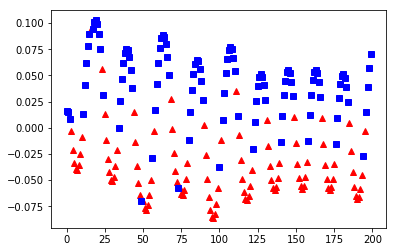

Episode 35/40 finished after 200 timesteps

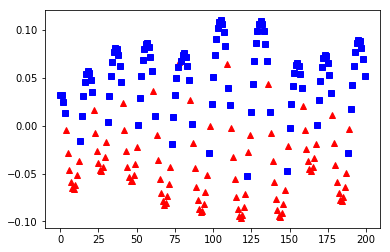

Episode 36/40 finished after 200 timesteps

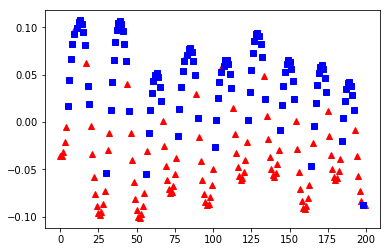

Episode 37/40 finished after 200 timesteps

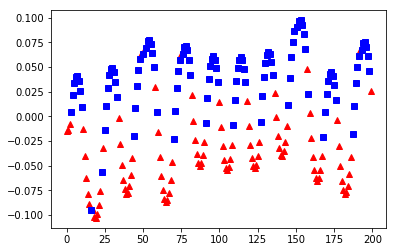

Episode 38/40 finished after 200 timesteps

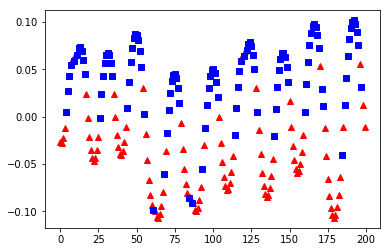

Episode 39/40 finished after 200 timesteps

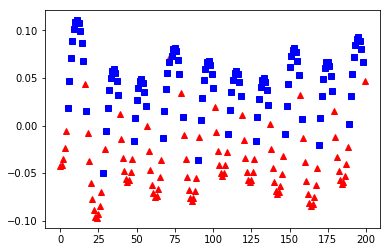

Episode 40/40 finished after 200 timesteps

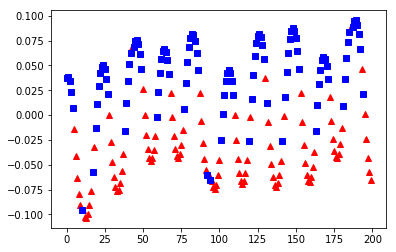

In [100]:
cum_reward = 0
frames = []
num_episodes=40
for i_episode in range(num_episodes):
    actions = []
    observation = env.reset()
    for t in range(500):
        cart_pos, cart_vel, pol_angle, pol_vel = observation
        frames.append(pol_angle)
        if np.abs(pol_vel) < 0.03 and actions != []:
            action = (actions[-1] + 1) % 2
        elif np.abs(pol_vel) > 1.2:
            action = int(round(np.sign(pol_vel) / 2 + 1/2))
        else:
            action = 0 if pol_angle < 0 else 1

        observation, reward, done, info = env.step(action)
        actions.append(action)
        # print(reward)  # always 1 for cartpole
        if done:
            print("\rEpisode {}/{} finished after {} timesteps".format(i_episode + 1, num_episodes, t+1), end="")
            left_frame_ids = [i for i in range(len(actions)) if actions[i] == 0]
            right_frame_ids = [i for i in range(len(actions)) if actions[i] == 1]
            left_frames = np.array(frames)[left_frame_ids]
            right_frames = np.array(frames)[right_frame_ids]
            plt.plot(left_frame_ids, left_frames, 'r^', right_frame_ids, right_frames, 'bs')
            plt.show()
            plt.close()
            frames = []
            break



http://kvfrans.com/simple-algoritms-for-solving-cartpole/